<a href="https://colab.research.google.com/github/Isra1997/DCT_Image_Compression/blob/master/DCT_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The root-mean-square-error =  3.990294184525754


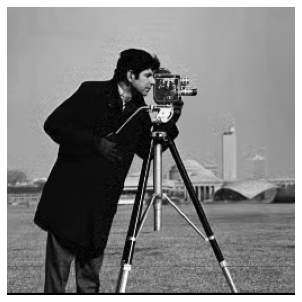

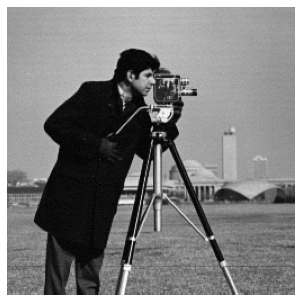

In [25]:
import numpy as np
from scipy.fftpack import dct
import matplotlib.pyplot as plt

def DCT(block):
  return scipy.fftpack.dct(scipy.fftpack.dct(block, axis=0, norm='ortho'), axis=1, norm='ortho')

def IDCT(block):
  return scipy.fftpack.idct(scipy.fftpack.idct(block, axis=0 , norm='ortho'), axis=1 , norm='ortho')

def DCT_Compression(n,image):
  img=np.array(image)
  result_image=np.zeros(img.shape)
  for i in range(0,img.shape[0]-n):
    for j in range(0,img.shape[1]):
      current_block_DCT = DCT(img[i:i+n-1,j:j+n-1])
      dct_thresh = current_block_DCT * (abs(current_block_DCT) > 20)
      IDCT_block = IDCT(dct_thresh)
      result_image[i:i+n-1,j:j+n-1]=IDCT_block
  return result_image

def DCT_Compression_RMS(image):
  img = np.array(image)
  result_image = np.zeros(img.shape)
  DCT_img = DCT(img)
  dct_thresh = DCT_img * (abs(DCT_img) > 10)
  IDCT_img = IDCT(dct_thresh)
  diff_img = np.subtract(img,IDCT_img)
  rms = np.sqrt(np.mean(diff_img**2))
  return rms,IDCT_img

def main():
  img=Image.open('cameraman.tif')
  # Function that computs DCT converted image
  n_image = DCT_Compression(16,img)
  fig = plt.figure(frameon=False)
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.imshow(Image.fromarray(n_image))

  # Function that computs the rms between the original imag and the DCT converted image
  rms,rms_image = DCT_Compression_RMS(img)
  fig = plt.figure(frameon=False)
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.imshow(Image.fromarray(rms_image))
  print('The root-mean-square-error = ',rms)


if __name__=='__main__':
  main()